Participantes:
*   Davi da Cunha Melo Tolentino
*   João Pedro Tavares de Siqueira
*   Rodrigo de Miranda Videira
*   Victor Gandu Pinheiro Arcanjo


# Plataformas de Streamings

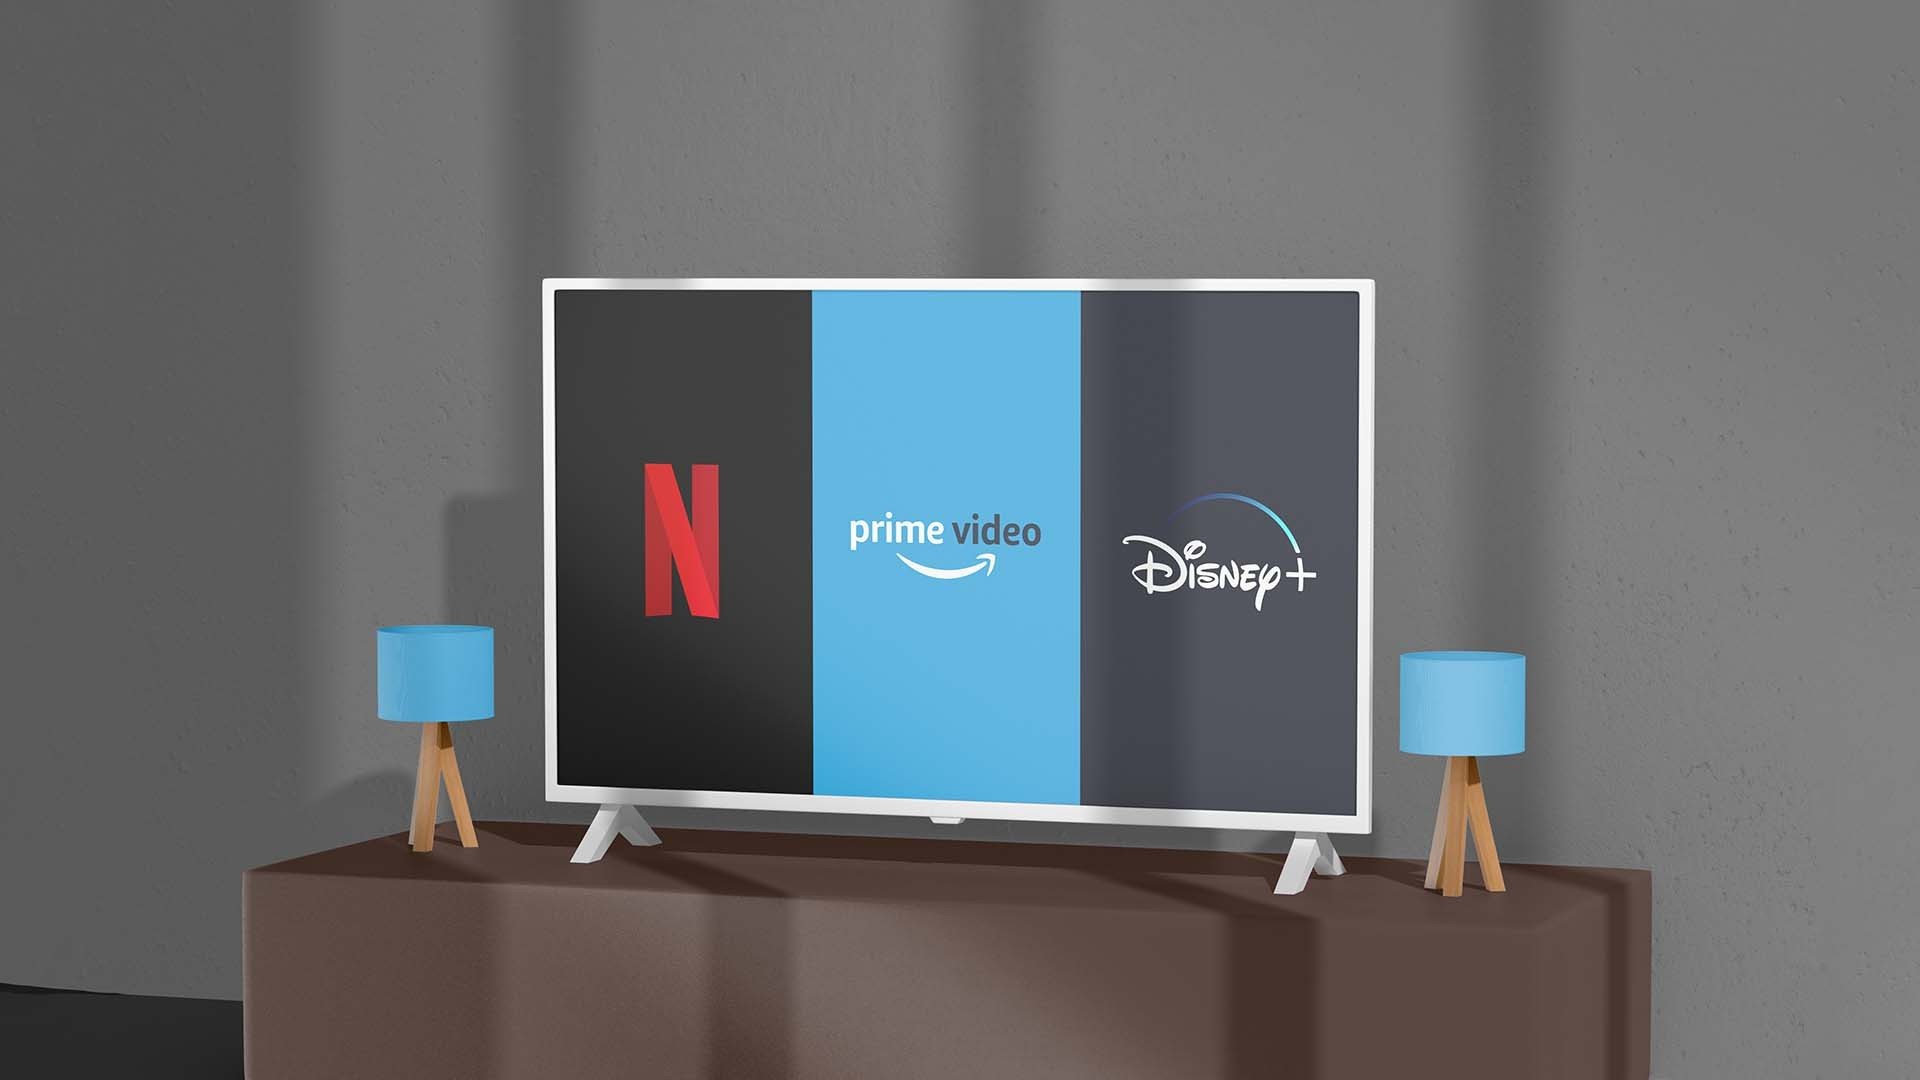

# Informações da Base de dados



 *   Utilizamos três bases de dados, extraídas do site Kagle
 *   São bases dos três principais serviços de streamings (Nettflix, Amazon Prime e Disney+)
 * Através das três bases coletadas utilizamos várias técnicas de KDD (Knowledge Discovery in Databases - Extração de conhecimento) para criar uma base única, e que foi utilizada para nossas análises







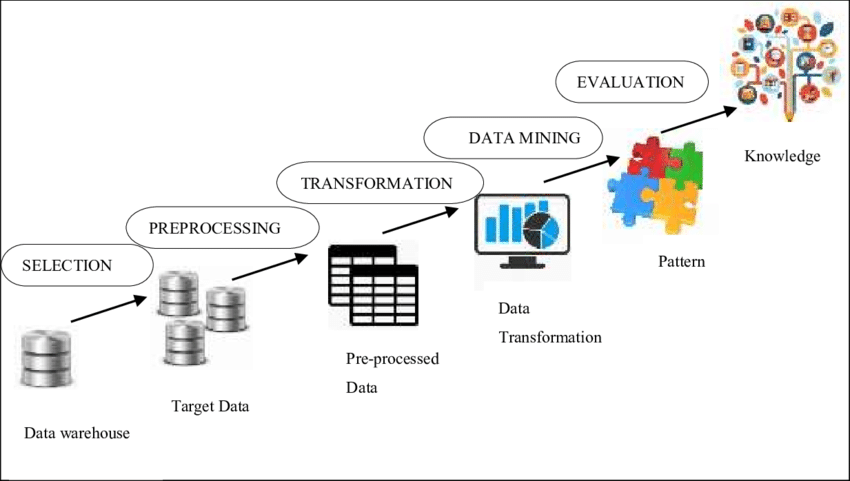

# Bibliotecas utilizadas

In [ ]:
!pip install unidecode

     |████████████████████████████████| 235 kB 5.1 MB/s 


In [ ]:
!pip install dataprep

     |████████████████████████████████| 3.5 MB 4.9 MB/s 
     |████████████████████████████████| 1.5 MB 40.9 MB/s 
     |████████████████████████████████| 943 kB 55.2 MB/s 
     |████████████████████████████████| 1.1 MB 41.8 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
     |████████████████████████████████| 158 kB 55.7 MB/s 
     |████████████████████████████████| 848 kB 45.4 MB/s 
     |████████████████████████████████| 10.9 MB 42.9 MB/s 
     |████████████████████████████████| 366 kB 14.3 MB/s 
     |████████████████████████████████| 719 kB 15.6 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 144 kB 28.3 MB/s 
     |████████████████████████████████| 271 kB 46.7 MB/s 
     |████████████████████████████████| 133 kB 44.4 MB/s 
     |████████████████████████████████| 49 kB 3.1 MB/s 
     |████████████████████████████████| 1.5 MB 38.6 MB/s 
     |████████████████████████████████| 1.5 MB 41.6 MB/s 
     |██████████████

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import unidecode
from dataprep.clean import clean_country

# Word Cloud
from nltk.tokenize import word_tokenize
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import wordcloud
from PIL import Image
import requests

NumExpr defaulting to 2 threads.


# **Base de Dados**

In [ ]:
amazon = pd.read_csv('https://letscodeeleicao.s3.us-west-1.amazonaws.com/amazon_prime_titles.csv')

In [ ]:
netflix = pd.read_csv('https://letscodeeleicao.s3.us-west-1.amazonaws.com/netflix_titles.csv')

In [ ]:
disney = pd.read_csv('https://letscodeeleicao.s3.us-west-1.amazonaws.com/disney_plus_titles.csv')

In [ ]:
amazon.drop(['show_id'], axis=1, inplace=True)
netflix.drop(['show_id'], axis=1, inplace=True)
disney.drop(['show_id'], axis=1, inplace=True)

# **Variáveis**

In [ ]:
amazon.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

* show_id -> Identificador único
* type -> Indica se é um Filme ou Série
* title -> Título do filme ou série
* director -> Diretor do filme
* cast -> Atores envolvidos no filme ou série
* country -> País onde o filme ou série foi produzido
* date_added -> Data de adição na plataforma
* release_year -> Ano de lançamento
* rating -> Classificação do filme\série
* duration -> Tempo de duração filme em minutos ou quantidade de temporadas das séries
* listed_in -> Gênero
* description -> Descrição resumida

## Tipo de variáves

* show_id -> Quantitativa discreta
* type -> Qualitativa nominal
* title -> Qualitativa nominal
* director -> Qualitativa nominal
* cast -> Qualitativa nominal
* country -> Qualitativa nominal
* date_added -> Qualitativa ordinal
* release_year -> Quantitativa discreta
* rating -> Qualitativa nominal
* duration -> Qualitativa nominal
* listed_in -> Qualitativa nominal
* description -> Qualitativa nominal

# **Curiosidades dos dados** 

## Quantidade de filmes por plataformas

In [ ]:
filmes_por_plataforma = pd.DataFrame({ "Plataforma" : ['Netflix', 'Amazon Prime', 'Disney+'],
                                       "Quantidade" : [netflix.title.count(),
                                                       amazon.title.count(),
                                                       disney.title.count()]})

In [ ]:
filmes_por_plataforma.sort_values(by='Quantidade', ascending=False)

,Plataforma,Quantidade
1,Amazon Prime,9668
0,Netflix,8807
2,Disney+,1450


In [ ]:
fig = px.pie(filmes_por_plataforma, 
             values='Quantidade', 
             names='Plataforma', 
             title='Percentual de filmes por streaming')
fig.show()

## Ano inicial e final dos filmes no catálogo dos streamings

In [ ]:
filmes_por_ano = pd.DataFrame({ "Plataforma" : ['Netflix', 'Amazon Prime', 'Disney+'],
                                "Ano inicial" : [netflix.release_year.min(),
                                                amazon.release_year.min(),
                                                disney.release_year.min()],
                                "Ano final" : [netflix.release_year.max(),
                                                  amazon.release_year.max(),
                                                  disney.release_year.max()]})

In [ ]:
filmes_por_ano.sort_values(by='Ano inicial')

,Plataforma,Ano inicial,Ano final
1,Amazon Prime,1920,2021
0,Netflix,1925,2021
2,Disney+,1928,2021


## Generos de filmes\séries por plataforma

In [ ]:
def generos_unicos(df):
    aux_df = df.listed_in.str.split(",").explode().str.strip()
    aux_df = aux_df.value_counts().reset_index()
    aux_df.columns = ["Gênero", "Quantidade de filmes"]
    return aux_df

In [ ]:
netflix_generos_unicos = generos_unicos(netflix)
netflix_generos_unicos = netflix_generos_unicos.head(10)

fig = px.bar(netflix_generos_unicos, 
             x="Quantidade de filmes", 
             y="Gênero", 
             orientation='h',
             title='Quantidade de filmes por gênero - Netflix')
fig.update_yaxes(autorange="reversed")
fig.show()

In [ ]:
amazon_generos_unicos = generos_unicos(amazon)
amazon_generos_unicos = amazon_generos_unicos.head(10)

fig = px.bar(amazon_generos_unicos, 
             x="Quantidade de filmes", 
             y="Gênero", 
             orientation='h',
             title='Quantidade de filmes por gênero - Amazon prime')
fig.update_yaxes(autorange="reversed")
fig.show()

In [ ]:
disney_generos_unicos = generos_unicos(disney)
disney_generos_unicos = disney_generos_unicos.head(10)

fig = px.bar(disney_generos_unicos, 
             x="Quantidade de filmes", 
             y="Gênero", 
             orientation='h',
             title='Quantidade de filmes por gênero - Disney+')
fig.update_yaxes(autorange="reversed")
fig.show()

# Base de dados unificada

In [ ]:
todos_streamings = pd.concat([netflix, amazon, disney])

Aplicando operação de remoção de acentos e caracteres especiais com o pacote *Unidecode*

In [ ]:
# Preenchendo valores faltantes com vazio
todos_streamings.cast.fillna('', inplace = True)
todos_streamings.director.fillna('', inplace = True)
todos_streamings.listed_in.fillna('', inplace = True)
todos_streamings.country.fillna('', inplace = True)

todos_streamings.title = todos_streamings.title.apply(lambda title:unidecode.unidecode(title))
todos_streamings.director = todos_streamings.director.apply(lambda director :unidecode.unidecode(director))
todos_streamings.cast = todos_streamings.cast.apply(lambda cast :unidecode.unidecode(cast))
todos_streamings.listed_in = todos_streamings.listed_in.apply(lambda listed_in :unidecode.unidecode(listed_in))
todos_streamings.country = todos_streamings.country.apply(lambda country :unidecode.unidecode(country))

Removendo filmes repetidos

In [ ]:
np.warnings.filterwarnings('ignore')

todos_streamings = todos_streamings[~todos_streamings.duplicated(['title', 'type', 'director', 'release_year'])]
todos_streamings.reset_index(drop=True)
todos_streamings.director[todos_streamings.director == ''] = np.nan
todos_streamings = todos_streamings.sort_values(by = ['type', 'title', 'release_year'])
todos_streamings.director.fillna(axis = 0,method = 'ffill', inplace = True)
todos_streamings = todos_streamings[~todos_streamings.duplicated(['type', 'title', 'director', 'release_year'])]
todos_streamings.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4667,Movie,Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,"September 1, 2018",2018,TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...
5968,Movie,Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,"September 15, 2018",2018,TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug..."
5969,Movie,Maj Rati Keteki,Santwana Bardoloi,"Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...",India,"September 15, 2018",2017,TV-14,117 min,"Dramas, International Movies",A successful writer returns to the town that l...
5970,Movie,Mayurakshi,Atanu Ghosh,"Soumitra Chatterjee, Prasenjit Chatterjee, Ind...",India,"September 15, 2018",2017,TV-14,100 min,"Dramas, International Movies",When a middle-aged divorcee returns to Kolkata...
3652,Movie,"!Ay, mi madre!",Frank Ariza,"Estefania de los Santos, Secun de la Rosa, Ter...",Spain,"July 19, 2019",2019,TV-MA,81 min,"Comedies, International Movies","When her estranged mother suddenly dies, a wom..."


# **Análise descritiva dos dados**

1. Qual genero mais apareceu no geral
2. Filmes por países
3. Filmes por diretores
4. Filmes americanos por atores
5. Filmes por ano adicionados
6. A palavra que mais aparece nos titulos dos filmes
7. Gênero 2020/2021
8. Média de duração dos filmes
9. Média de temporada de séries
10. Quantidade de filmes por classificação indicativa


## **1. Qual genero mais apareceu no geral**

In [ ]:
generos = todos_streamings[["title", "listed_in"]].copy()
generos = generos.listed_in.str.split(",").explode().fillna("Outros").str.strip()
generos = generos.value_counts().reset_index()
generos.columns = ["Gênero", "Quantidade de filmes"]
generos = generos[:15]
generos

,Gênero,Quantidade de filmes
0,Drama,3750
1,International Movies,2752
2,Comedy,2561
3,Dramas,2427
4,Comedies,1674
5,Action,1627
6,Suspense,1467
7,International TV Shows,1351
8,Kids,1208
9,Documentary,1158


In [ ]:
fig = px.bar(generos, 
             x="Quantidade de filmes", 
             y="Gênero", 
             orientation='h',
             title='Quantidade de filmes por gênero')
fig.update_yaxes(autorange="reversed")
fig.show()

## **2. Filmes por países**

In [ ]:
filmes_paises = todos_streamings[["title", "country"]].copy()
filmes_paises = filmes_paises.country.str.split(",").explode().fillna("Outros").str.strip()
filmes_paises = filmes_paises.value_counts().reset_index()
filmes_paises.columns = ["País", "Quantidade de filmes"]
filmes_paises = filmes_paises[1:11]
filmes_paises = clean_country(filmes_paises, 'País', output_format='alpha-3')
filmes_paises['Pais_Text'] = filmes_paises['País'] + ' - ' + filmes_paises['Quantidade de filmes'].astype(str)
filmes_paises.iloc[:, 0:2]

Country Cleaning Report:
	10 values cleaned (100.0%)
Result contains 10 (100.0%) values in the correct format and 0 null values (0.0%)


,País,Quantidade de filmes
1,United States,5171
2,India,1289
3,United Kingdom,968
4,Canada,553
5,France,432
6,Japan,334
7,Germany,252
8,Spain,247
9,South Korea,245
10,Australia,188


In [ ]:
fig = px.scatter_geo(filmes_paises, 
                     locations="País_clean",
                     hover_name="País", 
                     size="Quantidade de filmes",
                     projection="natural earth",
                     text="Pais_Text",
                     labels="País")
fig.show()

## **3. Filmes por diretores**

In [ ]:
filmes_diretores = todos_streamings[["title", "director"]].copy()
filmes_diretores = filmes_diretores.director.str.split(",").explode().fillna("Outros").str.strip()
filmes_diretores = filmes_diretores.value_counts().reset_index()
filmes_diretores.columns = ["Diretor", "Quantidade de filmes"]
filmes_diretores.head(10)

,Diretor,Quantidade de filmes
0,Mark Knight,154
1,John Dower,153
2,Masaaki Yuasa,120
3,He Xiaofeng,114
4,Mark Lewis,109
5,Noam Murro,107
6,Alessandro Angulo,86
7,Ken Burns,76
8,BB Sasore,76
9,Rich Schlansker,70


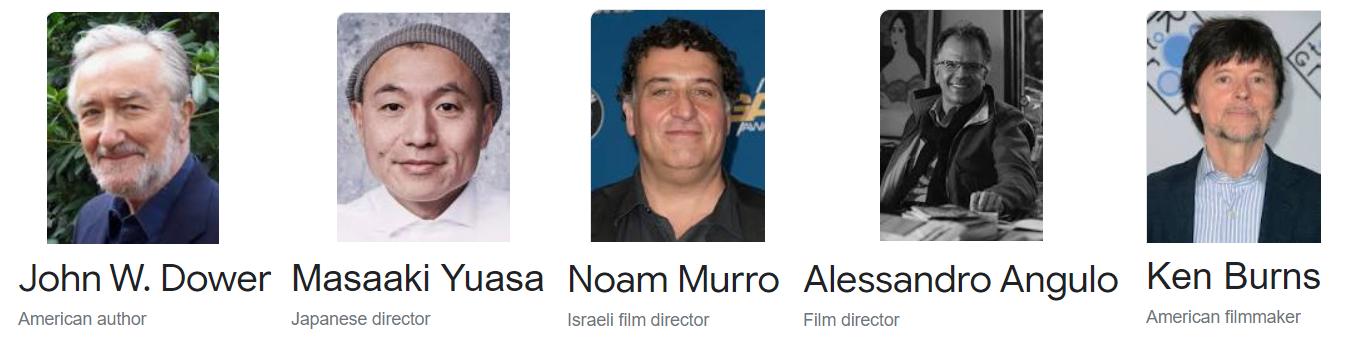

## **4 - Filmes americanos por atores**

In [ ]:
filmes_atores = todos_streamings[["title","country", "cast"]].copy()
filmes_atores = filmes_atores.query("(country == 'United States')")
filmes_atores = filmes_atores.cast.str.split(",").explode().str.strip()
filmes_atores = filmes_atores.value_counts().reset_index()
filmes_atores.columns = ["Ator\Atriz", "Quantidade de filmes"]
filmes_atores.iloc[1:,:].head(10)

,Ator\Atriz,Quantidade de filmes
1,Jim Cummings,32
2,Fred Tatasciore,24
3,Tony Hale,22
4,Walt Disney,20
5,Samuel L. Jackson,20
6,Larry the Cable Guy,20
7,Adam Sandler,20
8,Jeff Bennett,18
9,Joan Cusack,17
10,Keith David,16


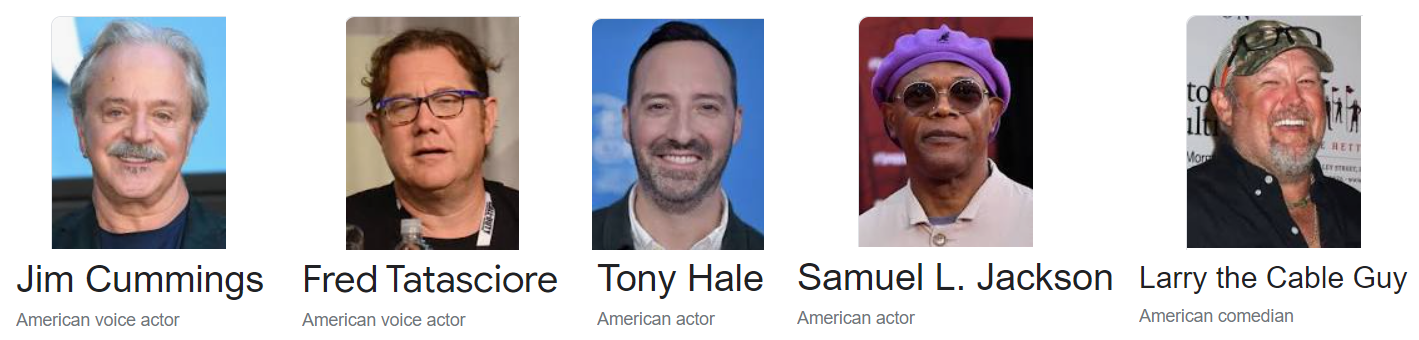

## **5. Filmes por ano adicionados**

In [ ]:
streamings_anos = todos_streamings[["title", "date_added"]].copy()
streamings_anos = streamings_anos.date_added.str.split(expand=True)[2].fillna("Sem ano").value_counts()
streamings_anos = streamings_anos.reset_index()
streamings_anos.columns = ["Ano", "Quantidade de filmes"]
streamings_anos[1:]

,Ano,Quantidade de filmes
1,2019,2773
2,2020,2221
3,2021,1977
4,2018,1649
5,2017,1188
6,2016,429
7,2015,82
8,2014,24
9,2011,13
10,2013,11


## **6. A palavra que mais aparece nos titulos dos filmes**

In [ ]:
titulos_netflix_concat=netflix.title.apply(lambda x :x+' ').sum()
titulos_amazon_concat=amazon.title.apply(lambda x :x+' ').sum()
titulos_disney_concat=disney.title.apply(lambda x :x+' ').sum()

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
en_stop_words=nltk.corpus.stopwords.words('english')

In [ ]:
lower_tokens_nf = [t for t in word_tokenize(titulos_netflix_concat.lower()) if t.isalpha()]
lower_tokens_am = [t for t in word_tokenize(titulos_amazon_concat.lower()) if t.isalpha()]
lower_tokens_ds = [t for t in word_tokenize(titulos_disney_concat.lower()) if t.isalpha()]

In [ ]:
tokens_without_sw_nf = [word for word in lower_tokens_nf if not word in en_stop_words]
tokens_without_sw_am = [word for word in lower_tokens_am if not word in en_stop_words]
tokens_without_sw_ds = [word for word in lower_tokens_ds if not word in en_stop_words]

In [ ]:
tokens_unicos_nf=list(dict.fromkeys(tokens_without_sw_nf))
tokens_unicos_am=list(dict.fromkeys(tokens_without_sw_am))
tokens_unicos_ds=list(dict.fromkeys(tokens_without_sw_ds))

In [ ]:
contagem_tokens_nf=[tokens_without_sw_nf.count(x) for x in tokens_unicos_nf]
contagem_tokens_am=[tokens_without_sw_am.count(x) for x in tokens_unicos_am]
contagem_tokens_ds=[tokens_without_sw_ds.count(x) for x in tokens_unicos_ds]

In [ ]:
res_netflix = {}
for key in tokens_unicos_nf:
    for value in contagem_tokens_nf:
        res_netflix[key] = value
        contagem_tokens_nf.remove(value)
        break 
res_amazon = {}
for key in tokens_unicos_am:
    for value in contagem_tokens_am:
        res_amazon[key] = value
        contagem_tokens_am.remove(value)
        break 
res_disney = {}
for key in tokens_unicos_ds:
    for value in contagem_tokens_ds:
        res_disney[key] = value
        contagem_tokens_ds.remove(value)
        break 

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud) 
    plt.axis("off");

In [ ]:
image_nf=Image.open(requests.get("https://logowik.com/content/uploads/images/netflix-n.jpg", stream=True).raw)
image_am=Image.open(requests.get("https://logosmarcas.net/wp-content/uploads/2021/03/Amazon-Prime-Video-Emblema.jpg", stream=True).raw)
image_ds=Image.open(requests.get("https://fontmeme.com/images/disney-logo.png", stream=True).raw)

In [ ]:
image_array_nf=np.array(image_nf)
image_array_am=np.array(image_am)
image_array_ds=np.array(image_ds)

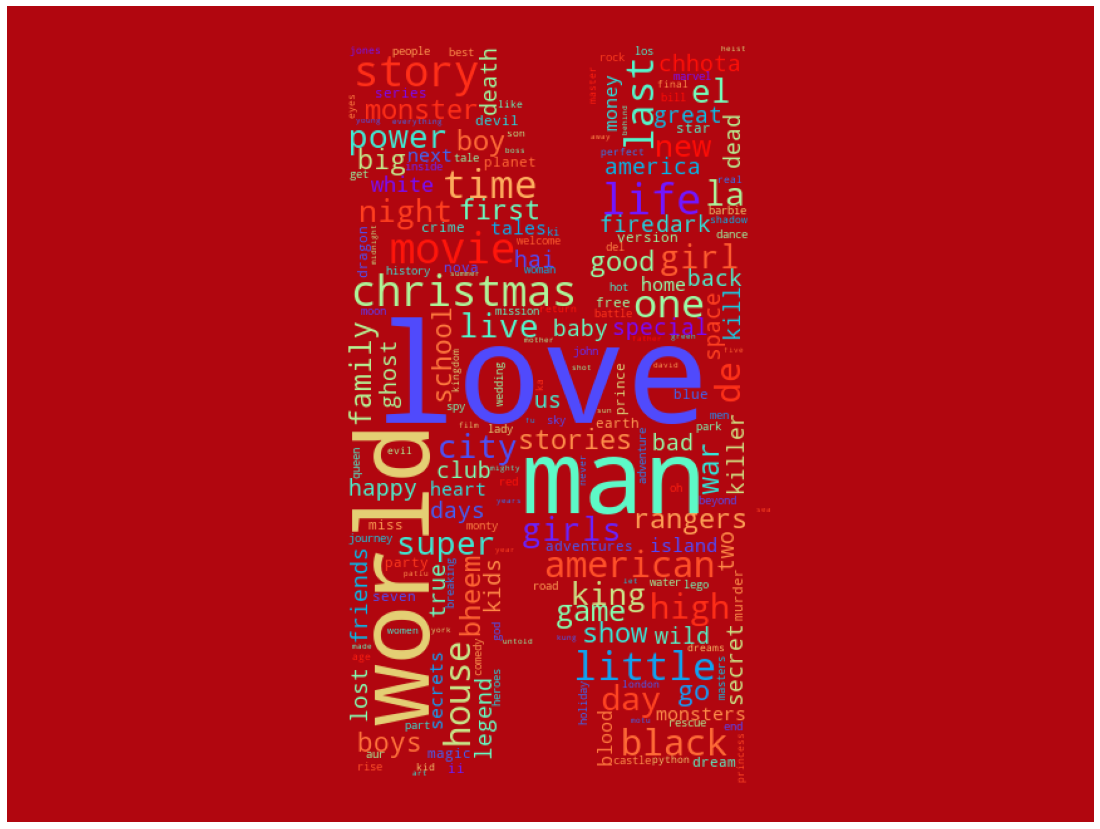

In [ ]:
wordcloud_netflix = WordCloud( width = 3000, 
                              height = 2000, 
                              random_state=1, 
                              background_color='#b1060f', 
                              colormap='rainbow', 
                              collocations=False,
                              mask=image_array_nf).generate_from_frequencies(res_netflix)

plot_cloud(wordcloud_netflix)

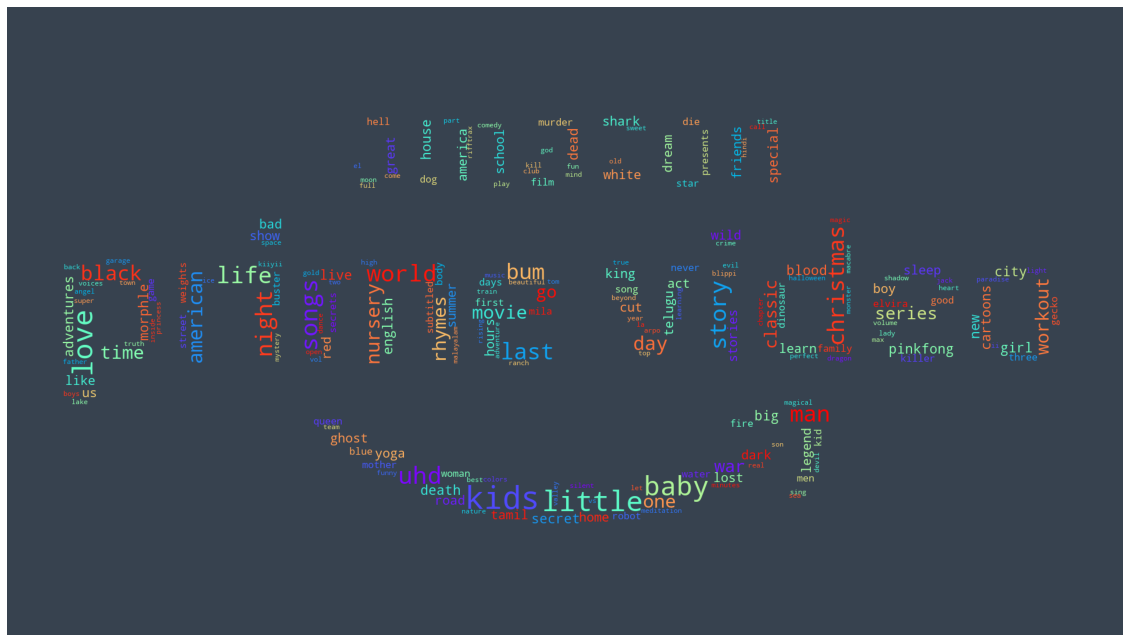

In [ ]:
wordcloud_amazon = WordCloud(width = 3000, 
                             height = 2000, 
                             random_state=1, 
                             background_color='#37424f', 
                             colormap='rainbow', 
                             collocations=False,
                             mask=image_array_am).generate_from_frequencies(res_amazon)

plot_cloud(wordcloud_amazon)

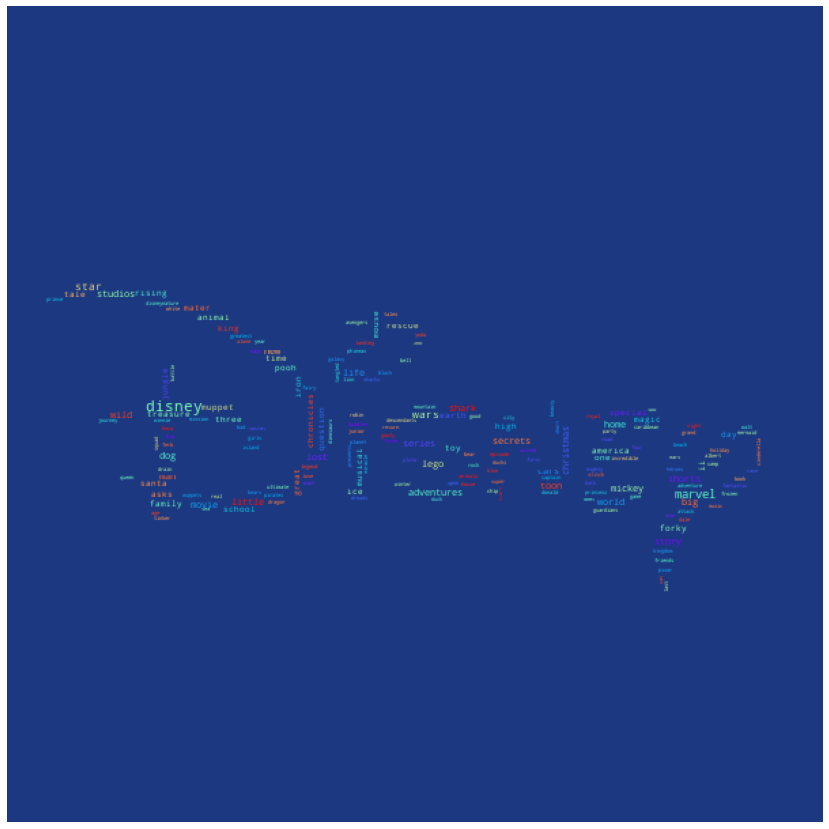

In [ ]:
wordcloud_disney = WordCloud( width = 3000, 
                             height = 2000, 
                             random_state=1, 
                             background_color='#1c3881', 
                             colormap='rainbow', 
                             collocations=False,
                             mask=image_array_ds).generate_from_frequencies(res_disney)

plot_cloud(wordcloud_disney)

## **7. Gênero 2020/2021**

In [ ]:
genero_por_ano = todos_streamings[["release_year", "listed_in"]].copy()
genero_por_ano.set_index('release_year', inplace=True)
genero_por_ano = genero_por_ano.listed_in.str.split(",").explode().str.strip()
genero_por_ano = genero_por_ano.reset_index()
genero_por_ano = genero_por_ano[genero_por_ano["release_year"] >= 2020]
genero_por_ano['Quantidade de filmes'] =1


genero_por_ano_2020 = genero_por_ano[genero_por_ano['release_year'] == 2020]
genero_por_ano_2020 = genero_por_ano_2020.reset_index()
genero_por_ano_2020['release_year'] = 'Ano 2020'
genero_por_ano_2020 = genero_por_ano_2020.groupby(['release_year','listed_in'])['Quantidade de filmes'].sum()
genero_por_ano_2020 = genero_por_ano_2020.to_frame().head(10).sort_values('Quantidade de filmes', ascending=False)

genero_por_ano_2021 = genero_por_ano[genero_por_ano['release_year'] == 2021]
genero_por_ano_2021 = genero_por_ano_2021.reset_index()
genero_por_ano_2021['release_year'] = 'Ano 2021'
genero_por_ano_2021 = genero_por_ano_2021.groupby(['release_year','listed_in'])['Quantidade de filmes'].sum()
genero_por_ano_2021 = genero_por_ano_2021.to_frame().head(10).sort_values('Quantidade de filmes', ascending=False)

genero_por_ano = pd.concat([genero_por_ano_2020, genero_por_ano_2021])
genero_por_ano
genero_por_ano = genero_por_ano.reset_index()
genero_por_ano.columns = ['Ano', 'Gênero', 'Quantidade de filmes']
genero_por_ano.set_index(['Ano','Gênero'])

Quantidade de filmes
Ano      Gênero                                  
Ano 2020 Action                               150
         Animation                             95
         Action & Adventure                    46
         Animals & Nature                      33
         Anime Series                          21
         Adventure                             16
         Action-Adventure                      14
         Anthology                              6
         Anime                                  4
         Anime Features                         3
Ano 2021 Action                               261
         Animation                            151
         Action & Adventure                    37
         Animals & Nature                      24
         Anime Series                          23
         Action-Adventure                      22
         Anime                                 10
         Anthology                              8
         Anime Features                         6
         Adventure                              4

In [ ]:
fig = px.bar(genero_por_ano, 
             x="Gênero", 
             y="Quantidade de filmes", 
             color="Ano", 
             barmode='group',
             title="Gêneros 2020/2021")
fig.show()

## **8. Média de duração dos filmes**

In [ ]:
duracao_media_filmes = todos_streamings.query('type=="Movie"')[["type", "duration"]].copy()
duracao_media_filmes.duration.replace(r'[a-z]+','', regex=True, inplace=True)
duracao_media_filmes.duration.dropna().astype(int).max()
# duracao_media_filmes['duration'].max()

classes = [50, 70, 90, 110, 130, 150, duracao_media_filmes.duration.dropna().astype(int).max()]
labels = ['50', '70', '90', '110', '130', '150']

duracao_media_filmes = duracao_media_filmes.dropna()

duracao_media_filmes.duration = duracao_media_filmes.duration.astype(int)
duracao_media_filmes.iloc[1,1]

duracao_media_filmes['duracao'] = pd.cut(x=duracao_media_filmes.duration, bins=classes, labels=labels)
duracao_media_filmes

duracao_media_filmes['qtd'] = 1
duracao_media_filmes = duracao_media_filmes.groupby(['duracao'])['qtd'].sum()
duracao_media_filmes = duracao_media_filmes.reset_index()
duracao_media_filmes.columns = ['Duração', 'Quantidade de filmes']
# duracao_media_filmes = duracao_media_filmes.sort_values(by='Quantidade de filmes', ascending=False)
duracao_media_filmes

,Duração,Quantidade de filmes
0,50,1383
1,70,3541
2,90,4989
3,110,1965
4,130,955
5,150,546


In [ ]:
fig = px.bar(duracao_media_filmes, 
             x="Duração", 
             y="Quantidade de filmes", 
             barmode='group',
             title="Duração dos filmes")
fig.show()

## **9. Média de temporada de séries**

In [ ]:
temporada_media_series = todos_streamings.query('type=="TV Show"')[["type", "duration"]].copy()
temporada_media_series.duration.replace(r'[a-zA-Z]+','', regex=True, inplace=True)
# temporada_media_series.duration.dropna().astype(int).mean()
temporada_media_series['qtd'] = 1
temporada_media_series = temporada_media_series.groupby(['duration'])['qtd'].sum()
temporada_media_series = temporada_media_series.reset_index()
temporada_media_series.columns = ['N° de temporadas', 'Quantidade de filmes']
temporada_media_series = temporada_media_series.sort_values(by='Quantidade de filmes', ascending=False)
temporada_media_series

,N° de temporadas,Quantidade de filmes
0,1,3342
10,2,734
13,3,351
15,4,181
16,5,112
17,6,58
18,7,41
19,8,28
20,9,16
1,10,14


In [ ]:
fig = px.bar(temporada_media_series, 
             x="N° de temporadas", 
             y="Quantidade de filmes", 
             barmode='group',
             title="Número de temporadas")
fig.show()

## **10. Quantidade de filmes por classificação indicativa**

In [ ]:
recomendacao_media = todos_streamings[["rating"]].copy()
recomendacao_media["COUNTER"] = 1
recomendacao_media = recomendacao_media.groupby('rating')["COUNTER"].sum()
recomendacao_media = recomendacao_media.to_frame()
recomendacao_media = recomendacao_media.reset_index()
recomendacao_media.columns = ['Classificação', 'Quantidade de filmes']
recomendacao_media.drop([1,4,6,7,8,9,11,13,14,28], inplace = True)
recomendacao_media = recomendacao_media.sort_values(by='Quantidade de filmes')
recomendacao_media

,Classificação,Quantidade de filmes
26,TV-Y7-FV,19
27,UNRATED,31
22,TV-NR,105
15,NR,298
12,G,382
5,7+,383
24,TV-Y,429
25,TV-Y7,504
20,TV-G,617
16,PG,751


In [ ]:
fig = px.bar(recomendacao_media, 
             x="Quantidade de filmes", 
             y="Classificação", 
             orientation='h',
             title='Quantidade de filmes por classificação')
fig.update_yaxes(autorange="reversed")
fig.show()